<br>
<div><center> 
   
<img src="images/logofacens.jpeg" width="300px">
    
<br>
    
<h1>FACULDADE DE ENGENHARIA DE SOROCABA</h1>
    
<h1>ESPECIALIZAÇÃO EM INTELIGÊNCIA ARTIFICIAL APLICADA (MACHINE LEARNING)</h1>
  
 <br><br>   
    
<h1>Detecção de pneumonia por imagens de raio-x</h1>

</center></div>

<br><br>
    
<div align="right">
<h3>Deverson Basilio da Silva - RA 191299</h3>
<h3>Luiz Fernando de Oliveira da Silva - RA 191361</h3>
<h3>Orientadora: Prof. Patricia Mika Sakugawa</h3>
<div> 
  
<br><br>
    
<div><center>
    
<h3>SOROCABA/SP</h3>
<h3>2020</h3>    

In [ ]:
<h2> Introdução </h2>

<h3> O que é Pneumonia? </h3>

<p> É a infecção do espaço intersticial pulmonar e/ou dos alvéolos. A infecção pode ser causada por diferentes microrganismos e outros agentes etiológicos tais como: </p>

<ul>
    <li>Mycoplasma;</li>
    <li>Chamidoplila vírus;</li>
    <li>Pneumococo haemophilus;</li>
    <li>Moraxella catarrhalis;</li>
    <li>reações alérgicas;</li>
    <li>produtos tóxicos.</li>
</ul>
<p> O quadro inflamatório gerado em resposta ao agente infeccioso configura a patologia: Pneumonia. </p>

<h3> Como é realizado o diagnóstico ?</h3>

<p>O diagnóstico é embasado em uma tríade:</p>    
<ul>
    <li>Anamnese;</li>
    <li>Quadro clínico ou Sintomatologia; </li>
    <li>Exame de imagem.</li>
</ul>
    
<h4><b>Anamnese</b></h4>
<p>A anamnese e exame físico fazem parte da etapa do Histórico de Enfermagem do Processo de Enfermagem. Sua implementação visa o cuidado individualizado, holístico, humanizado e com embasamento científico.</p>

<h4><b>Quadro clínico ou Sintomatologia </b></h4>
<p> Representa um conjunto de sinais e sintomas presentes em uma determinada doença.</p>
    
<h4><b>Exame de imagem</b></h4>
<p> São exames que visam a coleta de dados do interior do  corpo do paciente, utilizando-se de diferentes técnicas como campos magnéticos, ondas sonoras, câmeras e etc.
<p><i>Para detecção de Pneumonia, normalmente são utilizadas radiografias(raio-x).</i></p> 

<h3> Por que utilizar técnicas de inteligência artificial nesse processo?</h3>
<p> A tecnologia como um todo, primeiramente entra para dar apóio as interpretações clínicas e contribui para evitar erros humanos, não substituindo mas auxiliando o médico no processo. </p>
<p> Ao avaliar padrões nas imagens, o sistema pode tentar detectar fases da doença, não perceptíveis a olho humano.</p> 

<h3>Proposta</h3>

<p> Obter um conjunto de imagens de raio-x do Torax e através da aplicação de tecnicas de aprendidas no curso, conseguir classificar as imagens em 2 grupos específicos. Utilizando das técnicas aprendidas no curso para utlizar em um problema do mundo real:</p>

<ul>
    <li>Normal;   </li>
    <li>Pneumonia. </li>
</ul>  

<h2>Preparando o ambiente</h2>

[URL_Notebook_Ambiente](0%20-%20PREPARANDO%20O%20AMBIENTE.ipynb)

<h3>Importando Bibliotecas </h3>

In [1]:
import os
import filecmp
import numpy              as np
import pandas             as pd
import matplotlib.pyplot  as plt
import tensorflow         as tf
import random
import shutil
import seaborn            as sns

from distutils.dir_util        import copy_tree
from shutil                    import copyfile
from sklearn.model_selection   import train_test_split

from sklearn.metrics           import classification_report, confusion_matrix

from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import load_model
from tensorflow.python.keras.layers  import Flatten
from tensorflow.python.keras.layers  import Dense
from tensorflow.python.keras.layers  import Dropout

from keras.callbacks           import ModelCheckpoint
from keras.callbacks           import EarlyStopping
from keras.callbacks           import ReduceLROnPlateau
from keras.callbacks           import CSVLogger

from tensorflow.keras.applications.vgg16     import VGG16
from tensorflow.keras.applications.vgg19     import VGG19
from tensorflow.keras.applications.resnet50   import ResNet50 
from tensorflow.keras.applications.inception_v3        import InceptionV3
from tensorflow.keras.applications.inception_resnet_v2  import InceptionResNetV2

from tensorflow.python.keras.models  import Model
from tensorflow.keras.optimizers     import Adam

Using TensorFlow backend.


<div> 
<img src="images/ferramentasbibliotecas.png">
</div>

<h3>Arquitetura da Solução</h3>
<br>
<div> 
<img src="images/arquiteturasolucao.png">
</div>

<h3>Define funções</h3>

In [2]:
### Retorna o caminho completo da imagem pelo nome no dataset 01
def retorna_imagem(name):
    caminho = '' 
    for root, dirs, files in os.walk("DATASET/RAW/5839_18613_bundle_archive"):
        for file in files:
            if file == name: 
                caminho = root+'/'+str(file) 
    return caminho

def create_dataset():
    if not os.path.exists('DATASET/OFICIAL'):
        if not os.path.exists('DATASET/OFICIAL/train/PNEUMONIA'):
            os.makedirs('DATASET/OFICIAL/train/PNEUMONIA')

        if not os.path.exists('DATASET/OFICIAL/train/HEALTHY'):
            os.makedirs('DATASET/OFICIAL/train/HEALTHY')

        if not os.path.exists('DATASET/OFICIAL/test/PNEUMONIA'):
            os.makedirs('DATASET/OFICIAL/test/PNEUMONIA')

        if not os.path.exists('DATASET/OFICIAL/test/HEALTHY'):
            os.makedirs('DATASET/OFICIAL/test/HEALTHY')  
                
        print("-- Terminei Criar as pastas ")

        for index, row in train_healthy.iterrows():
            src =   retorna_imagem(row['Image Index']) 
            dst =   'DATASET/OFICIAL/train/HEALTHY/'+ row['Image Index']
            if not os.path.exists(dst) or not filecmp.cmp(src, dst):
                copyfile(src,dst)
        
        for index, row in train_pneumonia.iterrows():
            src =   retorna_imagem(row['Image Index']) 
            dst =   'DATASET/OFICIAL/train/PNEUMONIA/'+ row['Image Index']
            if not os.path.exists(dst) or not filecmp.cmp(src, dst):
                copyfile(src,dst)
                
        print("-- Terminei Train ")
        
        for index, row in test_healthy.iterrows():
            src =   retorna_imagem(row['Image Index']) 
            dst =   'DATASET/OFICIAL/test/HEALTHY/'+ row['Image Index']
            if not os.path.exists(dst) or not filecmp.cmp(src, dst):
                copyfile(src,dst)

        for index, row in test_pneumonia.iterrows():
            src =   retorna_imagem(row['Image Index']) 
            dst =   'DATASET/OFICIAL/test/PNEUMONIA/'+ row['Image Index']
            if not os.path.exists(dst) or not filecmp.cmp(src, dst):
                copyfile(src,dst)  
                
        print("-- Terminei Test ")        
        
def graphicos_treino(history):
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    # summarize history for loss
    plt.plot(history.history['AUC'])
    plt.plot(history.history['val_AUC'])
    plt.title('model auc')
    plt.ylabel('AUC')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

def graph_line(xtrain,xtest,yaxisname,graphname):
    plt.plot(xtrain)
    plt.plot(xtest)
    plt.title(graphname)
    plt.ylabel(yaxisname)
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.grid()
    plt.show()
    
def graphbar(n_groups, primeiro_grupo, segundo_grupo):
    
    # create plot
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 0.8

    rects1 = plt.bar(index, primeiro_grupo, bar_width,
    alpha=opacity,
    color='b',
    label='PNEUMONIA')

    rects2 = plt.bar(index + bar_width, segundo_grupo, bar_width,
    alpha=opacity,
    label='NORMAL')

    plt.xlabel('Person')
    plt.ylabel('Scores')
    plt.title('Scores by person')
    plt.xticks(index + bar_width, ('TOTAL', 'TREINO', 'TEST', 'VAL'))
    plt.legend()
    
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    
    plt.show()    
    
def countimagesforclass(path_root):
    PNEUMO = []
    NORMAL = []
    ABNORMAL = []

    for path, subdirs, files in os.walk(path_root):
        PNEUMOq = 0;
        NORMALq = 0;
        
        for name in files:

            if "PNEUMONIA" in path: 
                PNEUMOq += 1        
            elif "NORMAL" in path: 
                NORMALq += 1        
            else:
                ABNORMAL += 1
                
        if (PNEUMOq > 0):
            PNEUMO.append(PNEUMOq)
        
        if (NORMALq > 0):
            NORMAL.append(NORMALq)
        
    return PNEUMO, NORMAL
    
    
def list_files(path_root):
    for root, dirs, files in os.walk(path_root):
        level = root.replace(path_root, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1) 
        
        
def matrix_reload_confusion(cf_matrix):
    # plot 
    sns.heatmap(cf_matrix,annot=True, cmap="viridis" ,fmt='g')
    plt.xticks([0.5,1.5],labels=[1,0])
    plt.yticks([0.5,1.5],labels=[1,0])
    plt.title('Confusion matrix')
    plt.xlabel('Actual label')
    plt.ylabel('Predicted label');

<h3>Classes & Constantes </h3>

In [3]:
IMAGE_SIZE    = 512
NUM_CLASSES   = 2
BATCH_SIZE    = 4  
NUM_EPOCHS    = 50
WEIGHTS_FINAL = 'model-final.h5'
SEED          = 42

path_dataset01 = "Data_Entry_2017.csv"
path_dataset02 = "DATASET/xray"

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


<h3>Obtendo os dados : Dataset I</h3>

<p>O primeiro dataset encontrado foi o <a link="https://www.kaggle.com/nih-chest-xrays/data">NIH Chest X-ray Dataset</a>. O dataset criado pelo National Institutes of Health, possui <b>112120</b> imagens de raio-x com <b>30805</b> pacientes.</p> 

<p>As imagens foram nomeadas utilizando NLP, então podem haver erros. Mas a acurácia esperada na nomeação é acima de 90%. </p>

<p>As imagens tem o formato 1024x1024.</p>
<p>O dataset possui 15 classes.As classes são divididas em 14 doenças e 1 label saudável:</p>

<ul>
    <li>1 - Atelectasis;   </li>
    <li>2 - Cardiomegaly;  </li> 
    <li>3 - Effusion;      </li>
    <li>4 - Infiltration;  </li>
    <li>5 - Mass;          </li>
    <li>6 - Nodule;        </li>
    <li>7 - Pneumonia;     </li>
    <li>8 - Pneumothorax;  </li>
    <li>9 - Consolidation; </li>
    <li>10- Edema;        </li> 
    <li>11- Emphysema;    </li>
    <li>12- Fibrosis;     </li>
    <li>13- Pleural_Thickening;</li> 
    <li>14- Hernia;        </li> 
    <li>15- Saudável.      </li> 
</ul>

<p>Porém um novo cenário apareceu. As imagens são <b>multilabels</b> ou seja cada imagem pode apresentar mais de uma doença. </p>

<p>Desse dataset, verificamos que:</p>
<ul>
    <li><b>60361</b> imagens são de raio-x saudáveis;</li>
    <li><b>1431</b> imagens são de raio-x que possuem pneumonia;</li>
    <li><b>325</b>  imagens são de raio-x que possuem apenas pneumonia.</li>    
</ul>
<table>
    <tr>
        <td>
            <figure>
              <img src="DATASET\RAW\00030398_000.png" 
                   height=250 width=250>
              <figcaption>Consolidation|Effusion|Pneumonia</figcaption>
            </figure>
        </td>
        <td>
             <figure>
              <img src="DATASET\RAW\00030519_003.png" 
                   height=250 width=250>
              <figcaption>Atelectasis|Infiltration|Pneumonia</figcaption>
            </figure>
        </td>
        <td>
           <figure>
              <img src="DATASET\RAW\00030519_005.png" 
                   height=250 width=250>
              <figcaption>Atelectasis|Consolidation|Effusion|Pneumonia</figcaption>
            </figure>
        </td>        
    </tr>
    <tr>
         <td>
             <figure>
              <img src="DATASET\RAW\00030536_007.png" 
                   height=250 width=250>
              <figcaption>Atelectasis|Consolidation|Pneumonia</figcaption>
            </figure>
        </td>
        <td>
             <figure>
              <img src="DATASET\RAW\00030570_001.png" 
                   height=250 width=250>
              <figcaption>Edema|Infiltration|Pneumonia</figcaption>
            </figure>
        </td>
        <td>
             <figure>
              <img src="DATASET\RAW\00030621_002.png" 
                   height=250 width=250>
              <figcaption>Pneumonia</figcaption>
            </figure>
        </td>
    </tr>
    <tr>
        <td>
             <figure>
              <img src="DATASET\RAW\00030637_016.png" 
                   height=250 width=250>
              <figcaption>Consolidation|Pneumonia</figcaption>
            </figure>
        </td>
        <td>
             <figure>
              <img src="DATASET\RAW\00030801_001.png" 
                   height=250 width=250>
              <figcaption>Mass|Pneumonia</figcaption>
            </figure>
        </td>
         <td>
             <figure>
              <img src="DATASET\RAW\00030804_000.png" 
                   height=250 width=250>
              <figcaption>No Finding</figcaption>
            </figure>
        </td>
    </tr>    
</table>

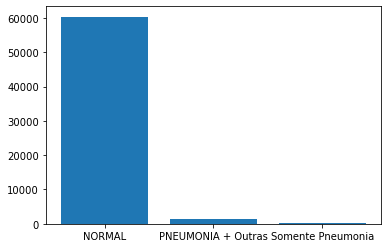

In [4]:
# Make a fake dataset:
height = [60361,1431,325]
bars = ('NORMAL','PNEUMONIA + Outras','Somente Pneumonia')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

<h3>Dividindo o Dataset</h3>

In [5]:
df_All_Imagens = pd.read_csv("Data_Entry_2017.csv")

df_healthy     = df_All_Imagens[df_All_Imagens['Finding Labels'].str.match("No Finding")].head(1431)
df_pneumonia   = df_All_Imagens[df_All_Imagens['Finding Labels'].str.contains("Pneumonia")]

Como é um dataset bem desbalanceado, utilizamos apenas 1431 imagens de cada classe, para balancea-lo

In [7]:
train_healthy  , test_healthy    = train_test_split(df_healthy ,train_size = 0.8 , random_state = SEED)
train_pneumonia, test_pneumonia  = train_test_split(df_pneumonia ,train_size = 0.8 , random_state = SEED)

In [6]:
create_dataset()

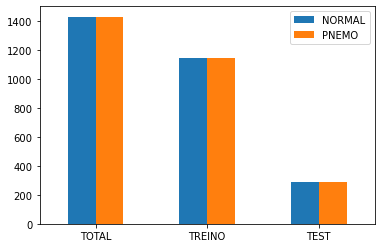

In [14]:
data1 = [1431,1144,287]
data2 = [1431,1144,287]

NORMAL = [1431,1144,287]
PNEMO  = [1431,1144,287]

index = ['TOTAL', 'TREINO', 'TEST']
df = pd.DataFrame({'NORMAL': NORMAL,'PNEMO': PNEMO}, index=index)
ax = df.plot.bar(rot=0)

<h3>Data Augmentation</h3>

In [ ]:
generic_generator = ImageDataGenerator(
                         samplewise_center           = True,     #Define a média de cada imagem como 0
                         samplewise_std_normalization= True,     #Divide cada Input pelo padrão 
                         horizontal_flip             = True,     #Gira a imagem horizontalmente 
                         vertical_flip               = False,    #Gira a imagem verticalmente 
                         height_shift_range          = 0.05,     #Altera a altura da imagem conforme range. 
                         width_shift_range           = 0.1,      #Altera a largura da imagem conforme range. 
                         rotation_range              = 5,        #Rotaciona a imagem conforme range 
                         shear_range                 = 0.1,      #Inclina imagem conforme range
                         fill_mode                   = 'reflect',#Ao girar ou modificar a imagem, espaços são criados. Esse método determina como serão preenchidos
                         zoom_range                  = 0.15,     #Utiliza um range para dar aproximar e afastar da imagem
                         rescale                     = 1/255)    #Valor pelo qual a imagem é multiplicada após todas as transformações.

<h3>Loading Images</h3>

In [7]:
train_generator = generic_generator.flow_from_directory(
    directory  =r"DATASET/OFICIAL/train", #Define o diretório das imagens de cada classe
    target_size=(IMAGE_SIZE,IMAGE_SIZE),  #Define o tamanho padrão das imagens ao carregar
    color_mode="rgb",                     #Define o padrão de coloração das imagens
    batch_size= BATCH_SIZE,               #Define a quantidade de grupos para os treinamentos
    class_mode="categorical",             #Define como devem interpretar as classes
    shuffle=True,                         #Define se as imagens devem ser sorteadas
    seed=SEED,                            #Em caso de imagens sorteadas, Seed serve para determinar a semente do aleatório,
    interpolation='bicubic'               #Define o método de preenchimento das imagens.
)

test_generator = generic_generator.flow_from_directory(
    directory  =r"DATASET/OFICIAL/test",
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    color_mode="rgb",
    batch_size= BATCH_SIZE,
    class_mode="categorical",
    shuffle=True,
    seed=SEED,
    interpolation='bicubic'
)

Found 2288 images belonging to 2 classes.
Found 574 images belonging to 2 classes.


<h3>Escolhendo o modelo</h3>

Quando chegamos ao ponto de partida, decidimos que poderiamos criar um classificador novo ou aproveitar de estruturas e redes conhecidas pré-treinadas. Foi quando buscamos quais as redes disponíveis para classificação de imagens.
Dentre elas haviam diversos modelos possíveis, abaixo listados:

<table class="table">
    <thead>
        <tr>
            <th> Model    </th>
            <th> Size     </th>
            <th> Accuracy </th>
            <th> Top-5 Accuracy</th>
            <th> Parameters</th>
            <th> Depth    </th>
        <tr>
    </thead>
    <tbody>
        <tr>
            <td>Xception</td>
            <td>88 MB</td>
            <td>0.790</td>
            <td>0.945</td>
            <td>22,910,480</td>
            <td>126 </td>
        </tr>         
        <tr>
            <td>VGG16 </td>
            <td>528 MB</td>
            <td>0.713</td>
            <td>0.901</td>
            <td>138,357,544</td>
            <td>23</td>
        </tr>
        <tr>
             <td>VGG19</td>
            <td>549 MB</td>
            <td>0.713</td>
            <td>0.900</td>
            <td>143,667,240</td>
            <td>26</td>
        </tr>
        <tr>
            <td>ResNet50</td>
            <td>98 MB</td>
            <td>0.749</td>
            <td>0.921</td>
            <td>25,636,712</td>
            <td>-</td>
        </tr>
        <tr>
            <td>ResNet101</td>
            <td>171 MB</td>
            <td>0.764</td>
            <td>0.928</td>
            <td>44,707,176</td>
            <td>-</td>
        </tr>
        <tr>
            <td>ResNet152</td>
            <td>232 MB</td>
            <td>0.766</td>
            <td>0.931</td>
            <td>60,419,944</td>
            <td>-</td>
        </tr>
        <tr>
            <td>ResNet50V2</td>
            <td>98 MB</td>
            <td>0.760</td>
            <td>0.930</td>
            <td>25,613,800</td>
            <td>-</td>
        </tr>
        <tr>
            <td>ResNet101V2</td>
            <td>171 MB</td>
            <td>0.772</td>
            <td>0.938</td>
            <td>44,675,560</td>
            <td>-</td>
        </tr>
        <tr>
            <td>ResNet152V2</td>
            <td>232 MB</td>
            <td>0.780</td>
            <td>0.942</td>
            <td>60,380,648</td>
            <td>-</td>
        </tr>
        <tr>
            <td>InceptionV3</td>
            <td>92 MB</td>
            <td>0.779</td>
            <td>0.937</td>
            <td>23,851,784</td>
            <td>159</td>
        </tr>        
        <tr>
            <td>InceptionResNetV2</td>
            <td>215 MB</td>
            <td>0.803</td>
            <td>0.953</td>
            <td>55,873,736</td>
            <td>572</td>   
        </tr>
        <tr>
            <td>MobileNet</td>
            <td>16 MB</td>
            <td>0.704</td>
            <td>0.895</td>
            <td>4,253,864</td>
            <td>88  </td>          
        </tr>        
        <tr>
            <td>MobileNetV2</td>
            <td>14 MB</td>
            <td>0.713</td>
            <td>0.901</td>
            <td>3,538,984</td>
            <td>88</td>
        </tr>        
        <tr>
            <td>DenseNet121</td>
            <td>33 MB</td>
            <td>0.750</td>
            <td>0.923</td>
            <td>8,062,504</td>
            <td>121</td>
        </tr>        
        <tr>
            <td>DenseNet169</td>
            <td>57 MB</td>
            <td>0.762</td>
            <td>0.932</td>
            <td>14,307,880</td>
            <td>169</td>
        </tr>
        <tr>
            <td>DenseNet201</td>
            <td>80 MB</td>
            <td>0.773</td>
            <td>0.936</td>
            <td>20,242,984</td>
            <td>201</td>
        </tr>
        <tr>
            <td>NASNetMobile</td>
            <td>23 MB</td>
            <td>0.744</td>
            <td>0.919</td>
            <td>5,326,716</td>
            <td>-</td>
        </tr>
        <tr>
            <td>NASNetLarge</td>
            <td>343 MB</td>
            <td>0.825</td>
            <td>0.960</td>
            <td>88,949,818</td>
            <td>-</td>
        </tr>
    </tbody>
</table>



Com a impossibilidade de treinar e testar todas as redes possíveis, verificamos outros notebook's e soluções propostas por outros, e restringimos o treino a 5 possíbilidades:

<ul> 
    <li>VGG16;</li>
    <li>VGG19;</li>
    <li>ResNet50;</li>
    <li>Inception;</li>
    <li>InceptionResNet.</li>
</ul>

A seguir treinamos os modelos:

###  VGG16

<h4>Callbacks - VGG16</h4>

In [13]:
#Salva o melhor modelo, julgando pela Loss do Teste.
checkpoint = ModelCheckpoint('modelos/Melhor_Modelo_VGG16.hdf5', monitor='val_loss', verbose=0, 
                              save_best_only=False,save_weights_only=False)

#Caso o modelo tenha atingido o melhor resultado e comece a piorar. Força o modelo a parar.
early       = EarlyStopping(monitor="val_loss", mode="min", patience=5)

#Salva o log do treinamento em arquivo.
csv_logger  = CSVLogger('logs/trainingVGG16.log', separator=',', append=False)

#Lista com todos os callbacks para o modelo.
callbacks_list = [checkpoint, early, csv_logger]

<h4>Definindo o modelo baseado em VGG16</h4>

In [12]:
#Uma vez que são modelos já treinados, utilizamos como base os Pesos da imagenet.

base_model = VGG16(input_shape=(IMAGE_SIZE, IMAGE_SIZE,3), weights='imagenet', include_top=False)

#Adicionamos algumas camadas finais ao modelo.
x = base_model.output
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(16, activation='relu')(x)

output_layer = Dense(NUM_CLASSES, activation='sigmoid', name='sigmoid')(x)

model_VGG = Model(inputs=base_model.input, outputs=output_layer)
model_VGG.compile(optimizer=Adam(lr=1e-5),loss='categorical_crossentropy', metrics=['accuracy','AUC'])
model_VGG.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 512, 512, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 512, 512, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 256, 256, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 256, 256, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 256, 256, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 128, 128, 128)     0   

<h4>VGG16 - Treinamento</h4>

In [10]:
model_VGG.fit(train_generator,
            steps_per_epoch = train_generator.samples // BATCH_SIZE,
            validation_data = test_generator,
            validation_steps = test_generator.samples // BATCH_SIZE,
            verbose=1,
            epochs = NUM_EPOCHS,
            callbacks=callbacks_list)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 572 steps, validate for 143 steps
Epoch 1/50
572/572 [==============================] - 514s 899ms/step - loss: 0.6826 - accuracy: 0.5747 - AUC: 0.5529 - val_loss: 0.6760 - val_accuracy: 0.6643 - val_AUC: 0.6407
Epoch 2/50
572/572 [==============================] - 449s 786ms/step - loss: 0.6521 - accuracy: 0.6329 - AUC: 0.6388 - val_loss: 0.6319 - val_accuracy: 0.6311 - val_AUC: 0.6782
Epoch 3/50
572/572 [==============================] - 505s 883ms/step - loss: 0.6213 - accuracy: 0.6643 - AUC: 0.7035 - val_loss: 0.5715 - val_accuracy: 0.7045 - val_AUC: 0.7763
Epoch 4/50
572/572 [==============================] - 470s 821ms/step - loss: 0.5732 - accuracy: 0.7120 - AUC: 0.7669 - val_loss: 0.5696 - val_accuracy: 0.6871 - val_AUC: 0.7674
Epoch 5/50
572/572 [==============================] - 448s 783ms/step - loss: 0.5495 - accuracy: 0.7238 - AUC: 0.7870 - val_loss: 0.5705 - val_accuracy: 0.7080 - val_AUC: 0.7744
Epoch 6/50
572/5

<h3>VGG19</h3>

<h4>Callbacks - VGG19</h4>

In [15]:
checkpoint = ModelCheckpoint('modelos/Melhor_Modelo_VGG19.hdf5', monitor='val_loss', verbose=0, 
                              save_best_only=False,save_weights_only=False)

early       = EarlyStopping(monitor="val_loss", mode="min", patience=5)
csv_logger  = CSVLogger('logs/trainingVGG19.log', separator=',', append=False)
callbacks_list = [checkpoint, early, csv_logger]

<h4>Definindo o modelo baseado em VGG19</h4>

In [12]:
base_model = VGG19(input_shape=(IMAGE_SIZE, IMAGE_SIZE,3), weights='imagenet', include_top=False)

x = base_model.output
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(16, activation='relu')(x)

output_layer = Dense(NUM_CLASSES, activation='sigmoid', name='sigmoid')(x)

model_VGG19 = Model(inputs=base_model.input, outputs=output_layer)
model_VGG19.compile(optimizer=Adam(lr=1e-5),loss='categorical_crossentropy', metrics=['accuracy','AUC'])
model_VGG19.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 512, 512, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 512, 512, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 256, 256, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 256, 256, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 256, 256, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 128, 128, 128)     0   

<h4>VGG19 - Treinamento</h4>

In [13]:
model_VGG19.fit(train_generator,
                steps_per_epoch = train_generator.samples // BATCH_SIZE,
                validation_data = test_generator,
                validation_steps = test_generator.samples // BATCH_SIZE,
                verbose=1,
                epochs = NUM_EPOCHS,
                callbacks=callbacks_list)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 572 steps, validate for 143 steps
Epoch 1/50
572/572 [==============================] - 536s 936ms/step - loss: 0.6842 - accuracy: 0.5564 - AUC: 0.5672 - val_loss: 0.6405 - val_accuracy: 0.6556 - val_AUC: 0.7074
Epoch 2/50
572/572 [==============================] - 534s 933ms/step - loss: 0.6349 - accuracy: 0.6477 - AUC: 0.6860 - val_loss: 0.6147 - val_accuracy: 0.7080 - val_AUC: 0.7559
Epoch 3/50
572/572 [==============================] - 534s 934ms/step - loss: 0.5821 - accuracy: 0.6949 - AUC: 0.7527 - val_loss: 0.5345 - val_accuracy: 0.7378 - val_AUC: 0.8066
Epoch 4/50
572/572 [==============================] - 535s 936ms/step - loss: 0.5624 - accuracy: 0.7264 - AUC: 0.7826 - val_loss: 0.5260 - val_accuracy: 0.7343 - val_AUC: 0.8169
Epoch 5/50
572/572 [==============================] - 535s 935ms/step - loss: 0.5345 - accuracy: 0.7421 - AUC: 0.8077 - val_loss: 0.5462 - val_accuracy: 0.7395 - val_AUC: 0.8003
Epoch 6/50
572/5

<h3>ResNet50</h3>

<h4>Callback's ResNet</h4>

In [16]:
checkpoint = ModelCheckpoint('modelos/Melhor_Modelo_resnet50.hdf5', monitor='val_loss', verbose=0, 
                              save_best_only=False,save_weights_only=False)

early       = EarlyStopping(monitor="val_loss", mode="min", patience=5)
csv_logger  = CSVLogger('logs/trainingResnet50.log', separator=',', append=False)
callbacks_list = [checkpoint, early, csv_logger]

<h4>Definindo o modelo baseado em ResNet50</h4>

In [15]:
base_model = ResNet50(input_shape=(IMAGE_SIZE, IMAGE_SIZE,3), weights='imagenet', include_top=False)

x = base_model.output
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(16, activation='relu')(x)

output_layer = Dense(NUM_CLASSES, activation='sigmoid', name='sigmoid')(x)

model_ResNet50 = Model(inputs=base_model.input, outputs=output_layer)
model_ResNet50.compile(optimizer=Adam(lr=1e-5),loss='categorical_crossentropy', metrics=['accuracy','AUC'])
model_ResNet50.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 518, 518, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 256, 256, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 256, 256, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

<h4>ResNet50 - Treinamento</h4>

In [16]:
model_ResNet50.fit(train_generator,
                    steps_per_epoch = train_generator.samples // BATCH_SIZE,
                    validation_data = test_generator,
                    validation_steps = test_generator.samples // BATCH_SIZE,
                    verbose=1,
                    epochs = NUM_EPOCHS,
                    callbacks=callbacks_list)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 572 steps, validate for 143 steps
Epoch 1/50
572/572 [==============================] - 339s 592ms/step - loss: 0.7168 - accuracy: 0.5402 - AUC: 0.5295 - val_loss: 0.6843 - val_accuracy: 0.5035 - val_AUC: 0.5359
Epoch 2/50
572/572 [==============================] - 339s 592ms/step - loss: 0.6771 - accuracy: 0.5726 - AUC: 0.5365 - val_loss: 0.8700 - val_accuracy: 0.6031 - val_AUC: 0.5670
Epoch 3/50
572/572 [==============================] - 338s 592ms/step - loss: 0.5939 - accuracy: 0.6932 - AUC: 0.5259 - val_loss: 0.5607 - val_accuracy: 0.7185 - val_AUC: 0.5354
Epoch 4/50
572/572 [==============================] - 338s 592ms/step - loss: 0.5007 - accuracy: 0.7548 - AUC: 0.5172 - val_loss: 0.5245 - val_accuracy: 0.7378 - val_AUC: 0.5071
Epoch 5/50
572/572 [==============================] - 338s 592ms/step - loss: 0.4608 - accuracy: 0.7902 - AUC: 0.5222 - val_loss: 0.4739 - val_accuracy: 0.7692 - val_AUC: 0.5193
Epoch 6/50
572/5

<h3>Inception V3</h3>

<h4>Callback's Inception V3</h4>

In [17]:
checkpoint = ModelCheckpoint('modelos/Melhor_Modelo_InceptionV3.hdf5', monitor='val_loss', verbose=0, 
                              save_best_only=False,save_weights_only=False)

early       = EarlyStopping(monitor="val_loss", mode="min", patience=5)
csv_logger  = CSVLogger('logs/trainingInceptionV3.log', separator=',', append=False)
callbacks_list = [checkpoint, early, csv_logger]

<h4>Definindo o modelo baseado em Inception V3</h4>

In [18]:
base_model = InceptionV3(input_shape=(IMAGE_SIZE, IMAGE_SIZE,3), weights='imagenet', include_top=False)

x = base_model.output
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(16, activation='relu')(x)

output_layer = Dense(NUM_CLASSES, activation='sigmoid', name='sigmoid')(x)

model_InceptionV3 = Model(inputs=base_model.input, outputs=output_layer)
model_InceptionV3.compile(optimizer=Adam(lr=1e-5),loss='categorical_crossentropy', metrics=['accuracy','AUC'])
model_InceptionV3.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 255, 255, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 255, 255, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 255, 255, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

<h4>ResNet50 - Treinamento</h4>

In [19]:
model_InceptionV3.fit(train_generator,
                        steps_per_epoch = train_generator.samples // BATCH_SIZE,
                        validation_data = test_generator,
                        validation_steps = test_generator.samples // BATCH_SIZE,
                        verbose=1,
                        epochs = NUM_EPOCHS,
                        callbacks=callbacks_list)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 572 steps, validate for 143 steps
Epoch 1/50
572/572 [==============================] - 363s 634ms/step - loss: 0.7005 - accuracy: 0.5319 - AUC: 0.5174 - val_loss: 0.6886 - val_accuracy: 0.5297 - val_AUC: 0.5556
Epoch 2/50
572/572 [==============================] - 315s 551ms/step - loss: 0.6439 - accuracy: 0.6372 - AUC: 0.6530 - val_loss: 0.6128 - val_accuracy: 0.6713 - val_AUC: 0.7295
Epoch 3/50
572/572 [==============================] - 344s 601ms/step - loss: 0.5892 - accuracy: 0.6906 - AUC: 0.5317 - val_loss: 0.5360 - val_accuracy: 0.7413 - val_AUC: 0.5383
Epoch 4/50
572/572 [==============================] - 515s 901ms/step - loss: 0.5314 - accuracy: 0.7338 - AUC: 0.5196 - val_loss: 0.5202 - val_accuracy: 0.7710 - val_AUC: 0.5026
Epoch 5/50
572/572 [==============================] - 322s 563ms/step - loss: 0.4757 - accuracy: 0.7736 - AUC: 0.5236 - val_loss: 0.6062 - val_accuracy: 0.7010 - val_AUC: 0.5333
Epoch 6/50
572/5

<h3>InceptionResNetV2</h3>

<h4>Callback's InceptionResNetV2</h4>

In [8]:
checkpoint = ModelCheckpoint('modelos/Melhor_Modelo_InceptionResNetV2.hdf5', monitor='val_loss', verbose=0, 
                              save_best_only=False,save_weights_only=False)

early       = EarlyStopping(monitor="val_loss", mode="min", patience=5)
csv_logger  = CSVLogger('logs/trainingInceptionResNetV2.log', separator=',', append=False)
callbacks_list = [checkpoint, early, csv_logger]

<h4>Definindo o modelo baseado em InceptionResNetV2</h4>

In [9]:
base_model = InceptionResNetV2(input_shape=(IMAGE_SIZE, IMAGE_SIZE,3), weights='imagenet', include_top=False)

x = base_model.output
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(16, activation='relu')(x)

output_layer = Dense(NUM_CLASSES, activation='sigmoid', name='sigmoid')(x)

model_InceptionResNetV2 = Model(inputs=base_model.input, outputs=output_layer)
model_InceptionResNetV2.compile(optimizer=Adam(lr=1e-5),loss='categorical_crossentropy', metrics=['accuracy','AUC'])
model_InceptionResNetV2.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 255, 255, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 255, 255, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 255, 255, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

Total params: 59,153,682
Trainable params: 59,093,138
Non-trainable params: 60,544
__________________________________________________________________________________________________


<h4>InceptionResNetV2 - Treinamento</h4>

In [10]:
model_InceptionResNetV2.fit(train_generator,
                            steps_per_epoch = train_generator.samples // BATCH_SIZE,
                            validation_data = test_generator,
                            validation_steps = test_generator.samples // BATCH_SIZE,
                            verbose=1,
                            epochs = NUM_EPOCHS,
                            callbacks=callbacks_list)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 572 steps, validate for 143 steps
Epoch 1/50
572/572 [==============================] - 675s 1s/step - loss: 0.6958 - accuracy: 0.5367 - AUC: 0.5374 - val_loss: 0.8429 - val_accuracy: 0.5769 - val_AUC: 0.5716
Epoch 2/50
572/572 [==============================] - 652s 1s/step - loss: 0.6488 - accuracy: 0.6329 - AUC: 0.6639 - val_loss: 0.6250 - val_accuracy: 0.6713 - val_AUC: 0.7015
Epoch 3/50
572/572 [==============================] - 644s 1s/step - loss: 0.5862 - accuracy: 0.6945 - AUC: 0.7540 - val_loss: 0.6034 - val_accuracy: 0.6906 - val_AUC: 0.7354
Epoch 4/50
572/572 [==============================] - 653s 1s/step - loss: 0.5439 - accuracy: 0.7303 - AUC: 0.7858 - val_loss: 0.8983 - val_accuracy: 0.6661 - val_AUC: 0.7047
Epoch 5/50
572/572 [==============================] - 638s 1s/step - loss: 0.4992 - accuracy: 0.7653 - AUC: 0.8245 - val_loss: 0.9069 - val_accuracy: 0.6976 - val_AUC: 0.7462
Epoch 6/50
572/572 [===========

<h3>Verificando qual o melhor modelo</h3>

In [21]:
df_VGG16 = pd.read_csv('logs/trainingVGG16.log')
df_VGG19 = pd.read_csv('logs/trainingVGG19.log')
df_RESNET50 = pd.read_csv('logs/trainingResnet50.log')
df_INCEPTION = pd.read_csv('logs/trainingInceptionV3.log')
df_INCEPTIONRESNET = pd.read_csv('logs/trainingInceptionResNetV2.log')

<h4>AUC</h4>

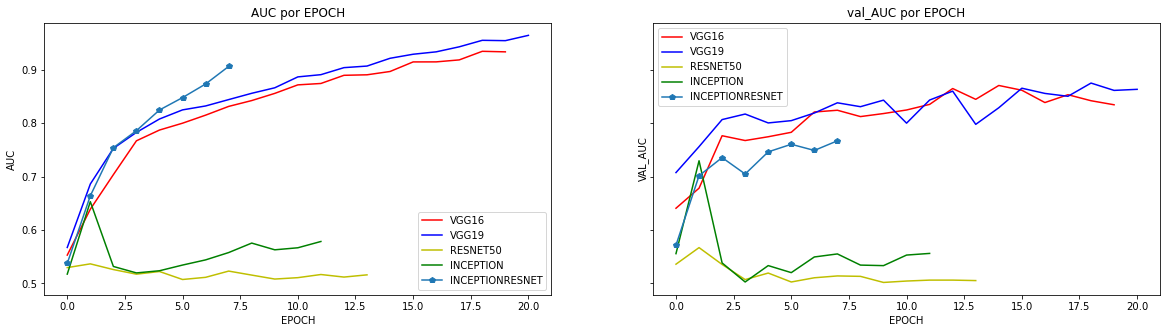

In [26]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(20,5))

ax1.set_title('AUC por EPOCH')
ax1.plot(df_VGG16["AUC"],'r-',label='VGG16')
ax1.plot(df_VGG19["AUC"],'b-',label='VGG19')
ax1.plot(df_RESNET50["AUC"],'-y',label='RESNET50')
ax1.plot(df_INCEPTION["AUC"],'-g',label='INCEPTION')
ax1.plot(df_INCEPTIONRESNET["AUC"],'-p',label='INCEPTIONRESNET')
ax1.set_xlabel('EPOCH')
ax1.set_ylabel('AUC')
ax1.legend()

ax2.set_title('val_AUC por EPOCH')
ax2.plot(df_VGG16["val_AUC"],'r-',label='VGG16')
ax2.plot(df_VGG19["val_AUC"],'b-',label='VGG19')
ax2.plot(df_RESNET50["val_AUC"],'-y',label='RESNET50')
ax2.plot(df_INCEPTION["val_AUC"],'-g',label='INCEPTION')
ax2.plot(df_INCEPTIONRESNET["val_AUC"],'-p',label='INCEPTIONRESNET')
ax2.set_xlabel('EPOCH')
ax2.set_ylabel('VAL_AUC')
ax2.legend()

<table>
  <thead>
    <tr>
        <th>MODEL</th>
        <th>AUC (max)</th>
        <th>val_AUC (max)</th>
    </tr>
  </thead>
    <tbody>
        <tr>
            <td>VGG16</td>
            <td>0.934353</td>
            <td>0.870417</td>
        </tr>
        <tr>
            <td>VGG19</td>
            <td td bgcolor="lightgreen">0.964217</td>
            <td td bgcolor="lightgreen">0.874908</td>
        </tr>
        <tr>
            <td>RESNET50</td>
            <td td bgcolor="pink"> 0.536543</td>
            <td td bgcolor="pink">0.566952</td>
        </tr>
        <tr>
            <td>INCEPTIONV3</td>
            <td>0.652979</td>
            <td>0.729507</td>
        </tr>
        <tr>
            <td>INCEPTIONRESNET</td>
            <td>0.906063</td>
            <td>0.766822</td>
        </tr>
    </tbody>
</table> 

<h4>Accuracy</h4>

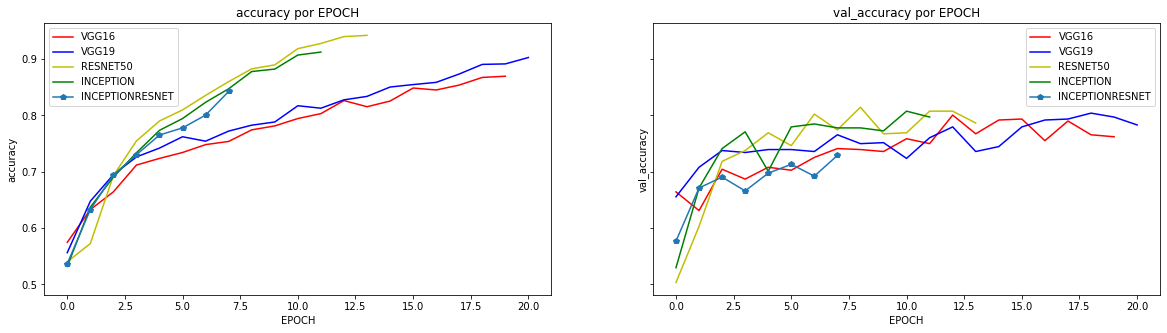

In [27]:
fig, ((ax3, ax4)) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(20,5))

ax3.set_title('accuracy por EPOCH')
ax3.plot(df_VGG16["accuracy"],'r-',label='VGG16')
ax3.plot(df_VGG19["accuracy"],'b-',label='VGG19')
ax3.plot(df_RESNET50["accuracy"],'-y',label='RESNET50')
ax3.plot(df_INCEPTION["accuracy"],'-g',label='INCEPTION')
ax3.plot(df_INCEPTIONRESNET["accuracy"],'-p',label='INCEPTIONRESNET')
ax3.set_xlabel('EPOCH')
ax3.set_ylabel('accuracy')
ax3.legend()

ax4.set_title('val_accuracy por EPOCH')
ax4.plot(df_VGG16["val_accuracy"],'r-',label='VGG16')
ax4.plot(df_VGG19["val_accuracy"],'b-',label='VGG19')
ax4.plot(df_RESNET50["val_accuracy"],'-y',label='RESNET50')
ax4.plot(df_INCEPTION["val_accuracy"],'-g',label='INCEPTION')
ax4.plot(df_INCEPTIONRESNET["val_accuracy"],'-p',label='INCEPTIONRESNET')
ax4.set_xlabel('EPOCH')
ax4.set_ylabel('val_accuracy')
ax4.legend()

<table>
  <thead>
    <tr>
        <th>MODEL</th>
        <th>Accuracy (max)</th>
        <th>val_Accuracy (max)</th>
    </tr>
  </thead>
    <tbody>
        <tr>
            <td>VGG16</td>
            <td>0.869755</td>
            <td>0.800699</td>
        </tr>
        <tr>
            <td>VGG19</td>
            <td>0.902972</td>
            <td>0.804196</td>
        </tr>
        <tr>
            <td>RESNET50</td>
            <td bgcolor="lightgreen">0.942308</td>
            <td bgcolor="lightgreen">0.814685</td>
        </tr>
        <tr>
            <td>INCEPTIONV3</td>
            <td>0.912587</td>
            <td>0.807692</td>
        </tr>
        <tr>
            <td>INCEPTIONRESNET</td>
            <td bgcolor="pink">0.842657</td>
            <td bgcolor="pink">0.729021</td>
        </tr>
    </tbody>
</table> 

<h4>Loss</h4>

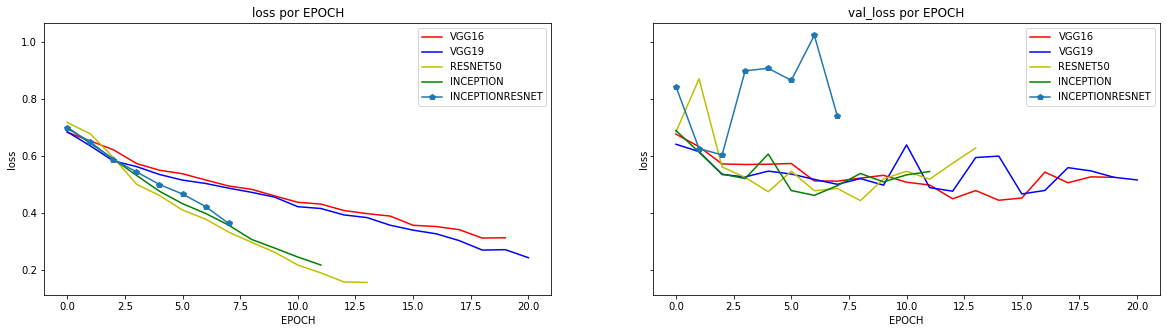

In [28]:
fig, ((ax5, ax6)) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(20,5))

ax5.set_title('loss por EPOCH')
ax5.plot(df_VGG16["loss"],'r-',label='VGG16')
ax5.plot(df_VGG19["loss"],'b-',label='VGG19')
ax5.plot(df_RESNET50["loss"],'-y',label='RESNET50')
ax5.plot(df_INCEPTION["loss"],'-g',label='INCEPTION')
ax5.plot(df_INCEPTIONRESNET["loss"],'-p',label='INCEPTIONRESNET')
ax5.set_xlabel('EPOCH')
ax5.set_ylabel('loss')
ax5.legend()

ax6.set_title('val_loss por EPOCH')
ax6.plot(df_VGG16["val_loss"],'r-',label='VGG16')
ax6.plot(df_VGG19["val_loss"],'b-',label='VGG19')
ax6.plot(df_RESNET50["val_loss"],'-y',label='RESNET50')
ax6.plot(df_INCEPTION["val_loss"],'-g',label='INCEPTION')
ax6.plot(df_INCEPTIONRESNET["val_loss"],'-p',label='INCEPTIONRESNET')
ax6.set_xlabel('EPOCH')
ax6.set_ylabel('loss')
ax6.legend()

<table>
  <thead>
    <tr>
        <th>MODEL</th>
        <th>loss (min)</th>
        <th>val_Accuracy (min)</th>
    </tr>
  </thead>
    <tbody>
        <tr>
            <td>VGG16</td>
            <td>0.311445</td>
            <td>0.444075</td>
        </tr>
        <tr>
            <td>VGG19</td>
            <td>0.242559</td>
            <td>0.466158</td>
        </tr>
        <tr>
            <td>RESNET50</td>
            <td bgcolor="lightgreen">0.155787</td>
            <td bgcolor="lightgreen">0.442870</td>
        </tr>
        <tr>
            <td>INCEPTIONV3</td>
            <td>0.216945</td>
            <td>0.461254</td>
        </tr>
        <tr>
            <td>INCEPTIONRESNET</td>
            <td bgcolor="pink">0.362599</td>
            <td bgcolor="pink">0.603364</td>
        </tr>
    </tbody>
</table> 

<h2>Conclusão</h2>

<p>Entre as redes propostas, a que melhor convergeu para um bom resultado, foram as VGG.</p>
<p>Apesar da RESNET50 apresentar alta accuracy e baixa loss, pelo resultado da acurácia fomos forçados a descarta-lá. </p>
<p>No entanto, percebemos um erro: Estavamos utilizando Categorical Cross Entropy ao invés de Binary Cross Entropy, para um problema de classificação binária.</p>

<p> Decedimos seguir VGG19, que apresentou o melhor resultado.</p>

<h3>VGG 19 - OFICIAL</h3>

<h3>VGG19 - Fine Tuning </h3>

Para tentar melhorar nosso modelo, decidimos variar o Learning Rate do modelo, para tentar melhorar a convergência do gradiente.

VGG19 - Callback

In [14]:
checkpoint = ModelCheckpoint('modelos/Melhor_Modelo_VGG19OFICIAL.hdf5', monitor='val_loss', verbose=0, save_best_only=False,save_weights_only=False)
early      = EarlyStopping(monitor="val_loss", mode="min", patience=10)
csv_logger = CSVLogger('logs/trainingVGG19OFICIAL.log', separator=',', append=False)
reduce_lr  = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, min_lr=0.0000001, verbose=1)

callbacks_list = [checkpoint, early, csv_logger,reduce_lr]

VGG19 - Criando o modelo 

In [17]:
base_model = VGG19(input_shape=(IMAGE_SIZE, IMAGE_SIZE,3), weights='imagenet', include_top=False)

x = base_model.output
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(16, activation='sigmoid')(x)
x = Dense(8, activation='sigmoid')(x)

output_layer = Dense(NUM_CLASSES, activation='sigmoid', name='sigmoid')(x)

for layer in base_model.layers[:16]:
    layer.trainable = False

for layer in base_model.layers[16:]:
    layer.trainable = True

model_VGG19OFICIAL = Model(inputs=base_model.input, outputs=output_layer)
model_VGG19OFICIAL.compile(optimizer=Adam(lr=1e-5),loss='binary_crossentropy', metrics=['accuracy','AUC'])
model_VGG19OFICIAL.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 512, 512, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 512, 512, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 256, 256, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 256, 256, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 256, 256, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 128, 128, 128)     0     

VGG19 - Treinamento

In [18]:
model_VGG19OFICIAL.fit(  train_generator,
                        steps_per_epoch = train_generator.samples // BATCH_SIZE,
                        validation_data = test_generator,
                        validation_steps = test_generator.samples // BATCH_SIZE,
                        verbose=1,
                        epochs = NUM_EPOCHS * 4,
                        callbacks=callbacks_list)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 572 steps, validate for 143 steps
Epoch 1/200
572/572 [==============================] - 360s 629ms/step - loss: 0.6825 - accuracy: 0.5540 - AUC: 0.5816 - val_loss: 0.6467 - val_accuracy: 0.6093 - val_AUC: 0.7110
Epoch 2/200
572/572 [==============================] - 290s 506ms/step - loss: 0.6517 - accuracy: 0.5979 - AUC: 0.7062 - val_loss: 0.6361 - val_accuracy: 0.6163 - val_AUC: 0.7554
Epoch 3/200
572/572 [==============================] - 312s 545ms/step - loss: 0.6359 - accuracy: 0.6115 - AUC: 0.7444 - val_loss: 0.6315 - val_accuracy: 0.6093 - val_AUC: 0.7492
Epoch 4/200
572/572 [==============================] - 296s 517ms/step - loss: 0.6271 - accuracy: 0.6184 - AUC: 0.7651 - val_loss: 0.6270 - val_accuracy: 0.6171 - val_AUC: 0.7532
Epoch 5/200
572/572 [==============================] - 268s 468ms/step - loss: 0.6213 - accuracy: 0.6224 - AUC: 0.7787 - val_loss: 0.6213 - val_accuracy: 0.6198 - val_AUC: 0.7733
Epoch 6/200

<h4>Analisando resultados</h4>

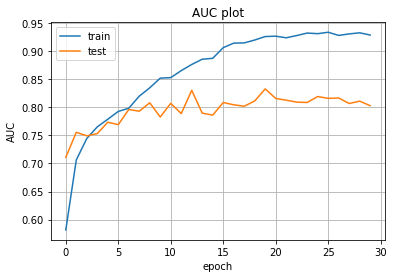

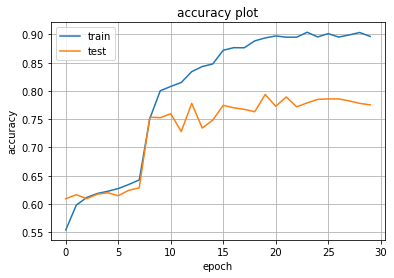

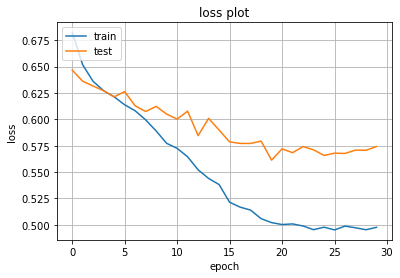

In [54]:
df_VGG19 = pd.read_csv('logs/trainingVGG19OFICIAL.log')
    
graph_line(df_VGG19['AUC'],df_VGG19['val_AUC'],'AUC','AUC plot')
graph_line(df_VGG19['accuracy'],df_VGG19['val_accuracy'],'accuracy','accuracy plot')
graph_line(df_VGG19['loss'],df_VGG19['val_loss'],'loss','loss plot')

<h3>Conclusão II</h3>

<p>No entanto, a perfomance do modelo acabou bem abaixo do esperado, como principal motivo acreditamos que faltaram dados caracteristicos para o modelo aprender.</p>
<p>Entre as possíveis soluções, estava aumentar a quantidade de dados buscando outro dataset ou gerando artificialmente.</p>

<p> Decidimos então buscar um segundo dataset, de uma outra fonte.</p>

<h3>Acrescentando dados - Dataset II </h3>

<p>O segundo dataset, foi encontrado no <a link="https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia/">Kaggle</a>, também desbalanceado, porém contrapondo o primeiro dataset, esse apresenta mais imagens saudáveis.</p>


Verificando Organização dos diretórios
Já organizado em treino, teste e validação, o dataset tem 2 classes.
xray/
    test/
        NORMAL/
        PNEUMONIA/
    train/
        NORMAL/
        PNEUMONIA/
    val/
        NORMAL/
        PNEUMONIA/


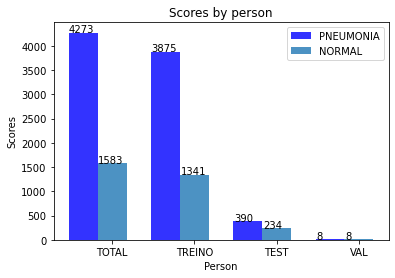

In [29]:
print("\n"+color.BOLD + "Verificando Organização dos diretórios" + color.END)

print("Já organizado em treino, teste e validação, o dataset tem 2 classes.")
list_files(path_dataset02)

pneumo, normal = countimagesforclass(path_dataset02)

pneumo.append(sum(pneumo))
normal.append(sum(normal))

graphbar(4,-np.sort(-np.array(pneumo)), -np.sort(-np.array(normal)))

<p> Ao contrário do primeiro dataset, que possuia imagens uniformes de 1024x1024, esse novo dataset possui uma grande variação de tamanho da imagem.</p>

<table>
    <tr>
        <td>
            <figure>
              <img src="DATASET\xray\train\PNEUMONIA\person336_bacteria_1553.jpeg" 
                   height=250 width=250>
              <figcaption>Pneumonia</figcaption>
            </figure>
        </td>
        <td>
            <figure>
              <img src="DATASET\xray\train\PNEUMONIA\person394_bacteria_1791.jpeg" 
                   height=250 width=250>
              <figcaption>Pneumonia</figcaption>
            </figure>
        </td>        
        <td>
            <figure>
              <img src="DATASET\xray\train\PNEUMONIA\person395_virus_788.jpeg" 
                   height=250 width=250>
              <figcaption>Pneumonia</figcaption>
            </figure>
        </td>
    </tr>
      <tr>
        <td>
            <figure>
              <img src="DATASET\xray\train\PNEUMONIA\person491_bacteria_2081.jpeg" 
                   height=250 width=250>
              <figcaption>Pneumonia</figcaption>
            </figure>
        </td>
            <td>
            <figure>
              <img src="DATASET\xray\train\PNEUMONIA\person506_bacteria_2136.jpeg" 
                   height=250 width=250>
              <figcaption>Pneumonia</figcaption>
            </figure>
        </td>
            <td>
            <figure>
              <img src="DATASET\xray\train\PNEUMONIA\person621_virus_1194.jpeg" 
                   height=250 width=250>
              <figcaption>Pneumonia</figcaption>
            </figure>
        </td>
    </tr>
      <tr>
        <td>
            <figure>
              <img src="DATASET\xray\train\NORMAL\NORMAL2-IM-1360-0001.jpeg" 
                   height=250 width=250>
              <figcaption>Normal</figcaption>
            </figure>
        </td>
            <td>
            <figure>
              <img src="DATASET\xray\train\NORMAL\NORMAL2-IM-1400-0001.jpeg" 
                   height=250 width=250>
              <figcaption>Normal</figcaption>
            </figure>
        </td>
            <td>
            <figure>
              <img src="DATASET\xray\train\NORMAL\NORMAL2-IM-0587-0001-0001.jpeg" 
                   height=250 width=250>
              <figcaption>Normal</figcaption>
            </figure>
        </td>
    </tr>
</table>

<h2>Criando um dataset novo</h2>

<h3>Merging dataset 01 & 02 </h3>

<h4>Criamos nosso dataset_final</h4>

In [90]:
if not os.path.exists('DATASET/_FINAL'):
    if not os.path.exists('DATASET/_FINAL/train/PNEUMONIA'):
        os.makedirs('DATASET/_FINAL/train/PNEUMONIA')

    if not os.path.exists('DATASET/_FINAL/train/NORMAL'):
        os.makedirs('DATASET/_FINAL/train/NORMAL')

    if not os.path.exists('DATASET/_FINAL/test/PNEUMONIA'):
        os.makedirs('DATASET/_FINAL/test/PNEUMONIA')

    if not os.path.exists('DATASET/_FINAL/test/NORMAL'):
        os.makedirs('DATASET/_FINAL/test/NORMAL')  
                
    if not os.path.exists('DATASET/_FINAL/val/PNEUMONIA'):
        os.makedirs('DATASET/_FINAL/val/PNEUMONIA')

    if not os.path.exists('DATASET/_FINAL/val/NORMAL'):
        os.makedirs('DATASET/_FINAL/val/NORMAL')

<h4> Carregamos as imagens do dataset 01 e divimos em treino, teste e validação </h4>

In [31]:
df_All_Imagens = pd.read_csv("Data_Entry_2017.csv")

df_healthy     = df_All_Imagens[df_All_Imagens['Finding Labels'].str.match("No Finding")]
df_pneumonia   = df_All_Imagens[df_All_Imagens['Finding Labels'].str.contains("Pneumonia")]

train_healthy  , test_healthy    = train_test_split(df_healthy ,train_size = 0.8 , random_state = SEED)
train_healthy  , val_healthy    = train_test_split(df_healthy ,train_size = 0.8 , random_state = SEED)

train_pneumonia, test_pneumonia  = train_test_split(df_pneumonia ,train_size = 0.8 , random_state = SEED)
train_pneumonia, val_pneumonia  = train_test_split(df_pneumonia ,train_size = 0.8 , random_state = SEED)

<h4>Copiamos as imagens do dataset 01 para suas respectivas pastas (train/test/val)</h4>

In [95]:
for index, row in train_healthy.iterrows():
    src =   "DATASET/RAW/" + str(row['Image Index']);
    dst =   'DATASET/_FINAL/train/NORMAL/'+ row['Image Index']
    
    if not os.path.exists(dst) or not filecmp.cmp(src, dst):
        copyfile(src,dst)

In [96]:
for index, row in train_pneumonia.iterrows():
    src =   "DATASET/RAW/" + str(row['Image Index']);
    dst =   'DATASET/_FINAL/train/PNEUMONIA/'+ row['Image Index']
    
    if not os.path.exists(dst) or not filecmp.cmp(src, dst):
        copyfile(src,dst)

In [99]:
for index, row in test_healthy.iterrows():
    src =   "DATASET/RAW/" + str(row['Image Index']);
    dst =   'DATASET/_FINAL/test/NORMAL/'+ row['Image Index']
    
    if not os.path.exists(dst) or not filecmp.cmp(src, dst):
        copyfile(src,dst)

In [100]:
for index, row in test_pneumonia.iterrows():
    src =   "DATASET/RAW/" + str(row['Image Index']);
    dst =   'DATASET/_FINAL/test/PNEUMONIA/'+ row['Image Index']
    
    if not os.path.exists(dst) or not filecmp.cmp(src, dst):
        copyfile(src,dst)

In [101]:
for index, row in val_healthy.iterrows():
    src =   "DATASET/RAW/" + str(row['Image Index']);
    dst =   'DATASET/_FINAL/val/NORMAL/'+ row['Image Index']
    if not os.path.exists(dst) or not filecmp.cmp(src, dst):
        copyfile(src,dst)

In [102]:
for index, row in val_pneumonia.iterrows():
    src =   "DATASET/RAW/" + str(row['Image Index']);
    dst =   'DATASET/_FINAL/val/PNEUMONIA/'+ row['Image Index']
    if not os.path.exists(dst) or not filecmp.cmp(src, dst):
        copyfile(src,dst) 

In [103]:
copy_tree("DATASET/xray/train/NORMAL", "DATASET/_FINAL/train/NORMAL/")
copy_tree("DATASET/xray/train/PNEUMONIA", "DATASET/_FINAL/train/PNEUMONIA/")
copy_tree("DATASET/xray/test/NORMAL", "DATASET/_FINAL/test/NORMAL/")
copy_tree("DATASET/xray/test/PNEUMONIA", "DATASET/_FINAL/test/PNEUMONIA/")
copy_tree("DATASET/xray/val/NORMAL", "DATASET/_FINAL/val/NORMAL/")
copy_tree("DATASET/xray/val/PNEUMONIA", "DATASET/_FINAL/val/PNEUMONIA/")

['DATASET/_FINAL/train/NORMAL/IM-0115-0001.jpeg',
 'DATASET/_FINAL/train/NORMAL/IM-0117-0001.jpeg',
 'DATASET/_FINAL/train/NORMAL/IM-0119-0001.jpeg',
 'DATASET/_FINAL/train/NORMAL/IM-0122-0001.jpeg',
 'DATASET/_FINAL/train/NORMAL/IM-0125-0001.jpeg',
 'DATASET/_FINAL/train/NORMAL/IM-0127-0001.jpeg',
 'DATASET/_FINAL/train/NORMAL/IM-0128-0001.jpeg',
 'DATASET/_FINAL/train/NORMAL/IM-0129-0001.jpeg',
 'DATASET/_FINAL/train/NORMAL/IM-0131-0001.jpeg',
 'DATASET/_FINAL/train/NORMAL/IM-0133-0001.jpeg',
 'DATASET/_FINAL/train/NORMAL/IM-0135-0001.jpeg',
 'DATASET/_FINAL/train/NORMAL/IM-0137-0001.jpeg',
 'DATASET/_FINAL/train/NORMAL/IM-0140-0001.jpeg',
 'DATASET/_FINAL/train/NORMAL/IM-0141-0001.jpeg',
 'DATASET/_FINAL/train/NORMAL/IM-0143-0001.jpeg',
 'DATASET/_FINAL/train/NORMAL/IM-0145-0001.jpeg',
 'DATASET/_FINAL/train/NORMAL/IM-0147-0001.jpeg',
 'DATASET/_FINAL/train/NORMAL/IM-0149-0001.jpeg',
 'DATASET/_FINAL/train/NORMAL/IM-0151-0001.jpeg',
 'DATASET/_FINAL/train/NORMAL/IM-0152-0001.jpeg',


<h3>Unbaleced Data</h3>

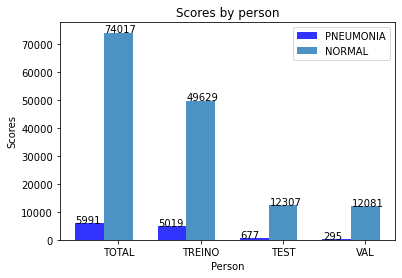

In [109]:
pneumo, normal = countimagesforclass("DATASET/_FINAL/")

pneumo.append(sum(pneumo))
normal.append(sum(normal))

graphbar(4,-np.sort(-np.array(pneumo)), -np.sort(-np.array(normal)))

<h3>Undersampling</h3>

Com o dataset desbanceado, decidimos utilizar a técnica de Undersampling, removendo amostras da classe de tamanho maior para que a mesma fique com a quantidade de amostras da menor amostra.

In [112]:

all_train_images = os.listdir("DATASET/_FINAL/train/NORMAL/")
all_test_images = os.listdir("DATASET/_FINAL/test/NORMAL/")
all_val_images = os.listdir("DATASET/_FINAL/val/NORMAL/")

if not os.path.exists('DATASET/_FINAL/train/HEALTHY'):
    os.makedirs('DATASET/_FINAL/train/HEALTHY')

if not os.path.exists('DATASET/_FINAL/test/HEALTHY'):
    os.makedirs('DATASET/_FINAL/test/HEALTHY')
    
if not os.path.exists('DATASET/_FINAL/val/HEALTHY'):
    os.makedirs('DATASET/_FINAL/val/HEALTHY')
        
for to_copy in random.sample(all_train_images, 5019):
    src = "DATASET/_FINAL/train/NORMAL/" + to_copy
    dst = "DATASET/_FINAL/train/HEALTHY/" + to_copy
    if not os.path.exists(dst) or not filecmp.cmp(src, dst):
        copyfile(src,dst)
for to_copy in random.sample(all_test_images, 677):
    src = "DATASET/_FINAL/test/NORMAL/" + to_copy
    dst = "DATASET/_FINAL/test/HEALTHY/" + to_copy
    if not os.path.exists(dst) or not filecmp.cmp(src, dst):
        copyfile(src,dst)
        
for to_copy in random.sample(all_val_images, 295):
    src = "DATASET/_FINAL/val/NORMAL/" + to_copy
    dst = "DATASET/_FINAL/val/HEALTHY/" + to_copy
    if not os.path.exists(dst) or not filecmp.cmp(src, dst):
        copyfile(src,dst)

In [114]:
shutil.rmtree("DATASET/_FINAL/train/NORMAL/",ignore_errors = True)
shutil.rmtree("DATASET/_FINAL/test/NORMAL/",ignore_errors = True)
shutil.rmtree("DATASET/_FINAL/val/NORMAL/",ignore_errors = True)

In [117]:
shutil.move("DATASET/_FINAL/train/HEALTHY/","DATASET/_FINAL/train/NORMAL/")
shutil.move("DATASET/_FINAL/test/HEALTHY/","DATASET/_FINAL/test/NORMAL/")
shutil.move("DATASET/_FINAL/val/HEALTHY/","DATASET/_FINAL/val/NORMAL/")

'DATASET/_FINAL/val/NORMAL/'

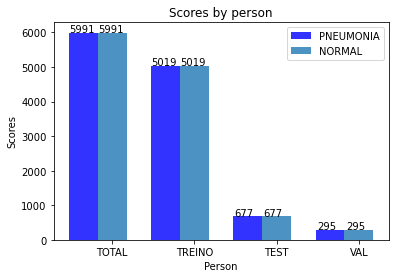

In [32]:
pneumo, normal = countimagesforclass("DATASET/_FINAL/")

pneumo.append(sum(pneumo))
normal.append(sum(normal))

graphbar(4,-np.sort(-np.array(pneumo)), -np.sort(-np.array(normal)))

<h3>Gerando novos dados e carregando o Dataset</h3>

In [4]:
train_gen = ImageDataGenerator( rescale=1./255)  

test_gen = ImageDataGenerator(rescale=1./255)

train_st = train_gen.flow_from_directory(directory="DATASET/_FINAL/train",
                                                target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                color_mode="rgb",
                                                batch_size= BATCH_SIZE,
                                                class_mode="binary",
                                                shuffle=True,
                                                seed=SEED,
                                                interpolation='bicubic'
                                            )

test_st = test_gen.flow_from_directory(directory="DATASET/_FINAL/test",
                                                target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                color_mode="rgb",
                                                batch_size= BATCH_SIZE,
                                                class_mode="binary",
                                                shuffle=True,
                                                seed=SEED,
                                                interpolation='bicubic'
                                            )


val_st = test_gen.flow_from_directory(directory="DATASET/_FINAL/val",
                                                target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                color_mode="rgb",
                                                batch_size= BATCH_SIZE,
                                                class_mode="binary",
                                                shuffle=True,
                                                seed=SEED,
                                                interpolation='bicubic'
                                            )

Found 10038 images belonging to 2 classes.
Found 1354 images belonging to 2 classes.
Found 590 images belonging to 2 classes.


Obs: Ao carregar os primeiros modelos, haviamos usados o class_mode: Categorical, porem por se tratar de um problema de classificação binaria trocamos para class_mode = Binary.

<h3>VGG19 - Final</h3>

<h4>VGG19FINAL - Callback's</h4>

In [36]:
checkpoint = ModelCheckpoint('modelos/Modelo_VGG19_FINAL02.hdf5', monitor='val_loss', verbose=0, save_best_only=False,save_weights_only=False)
early      = EarlyStopping(monitor="val_loss", mode="min", patience=10)
csv_logger = CSVLogger('logs/trainingVGG19_FINAL02.log', separator=',', append=False)
reduce_lr  = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, min_lr=0.0000001, verbose=1)

callbacks_list = [checkpoint, early, csv_logger,reduce_lr]

<h4>VGG19FINAL - Definindo modelo</h4>

In [17]:
base_model = VGG19(input_shape=(IMAGE_SIZE, IMAGE_SIZE,3), weights='imagenet', include_top=False)

x = base_model.output
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(16, activation='sigmoid')(x)
x = Dropout(0.5)(x)
x = Dense(8, activation='sigmoid')(x)

output_layer = Dense(1, activation='sigmoid', name='sigmoid')(x)

for layer in base_model.layers[:20]:
    layer.trainable = False

for layer in base_model.layers[20:]:
    layer.trainable = True

model_VGG19_FINAL2 = Model(inputs=base_model.input, outputs=output_layer)
model_VGG19_FINAL2.compile(optimizer=Adam(lr=1e-5),loss='binary_crossentropy', metrics=['accuracy','AUC'])
model_VGG19_FINAL2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 512, 512, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 512, 512, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 256, 256, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 256, 256, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 256, 256, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 128, 128, 128)     0   

<h4>VGG19FINAL - Treinando</h4>

In [18]:
model_VGG19_FINAL2.fit(  train_st,
                        steps_per_epoch = train_st.samples // BATCH_SIZE,
                        validation_data = test_st,
                        validation_steps = test_st.samples // BATCH_SIZE,
                        verbose=1,
                        epochs = NUM_EPOCHS * 4,
                        callbacks=callbacks_list)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 2509 steps, validate for 338 steps
Epoch 1/200
2509/2509 [==============================] - 944s 376ms/step - loss: 0.6103 - accuracy: 0.7506 - AUC: 0.8701 - val_loss: 0.6140 - val_accuracy: 0.7796 - val_AUC: 0.8474
Epoch 2/200
2509/2509 [==============================] - 950s 379ms/step - loss: 0.5806 - accuracy: 0.8307 - AUC: 0.8903 - val_loss: 0.6028 - val_accuracy: 0.7818 - val_AUC: 0.8442
Epoch 3/200
2509/2509 [==============================] - 922s 367ms/step - loss: 0.5658 - accuracy: 0.8489 - AUC: 0.8931 - val_loss: 0.5869 - val_accuracy: 0.7892 - val_AUC: 0.8539
Epoch 4/200
2509/2509 [==============================] - 1131s 451ms/step - loss: 0.5511 - accuracy: 0.8582 - AUC: 0.8967 - val_loss: 0.5762 - val_accuracy: 0.7907 - val_AUC: 0.8521
Epoch 5/200
2509/2509 [==============================] - 932s 371ms/step - loss: 0.5367 - accuracy: 0.8648 - AUC: 0.9018 - val_loss: 0.5686 - val_accuracy: 0.7892 - val_AUC: 0.8406

<h4>VGG19FINAL - Avaliando modelo</h4>

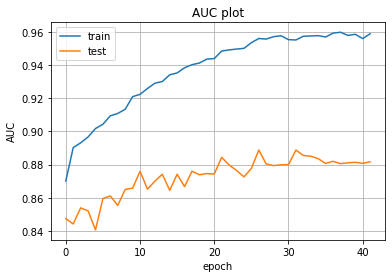

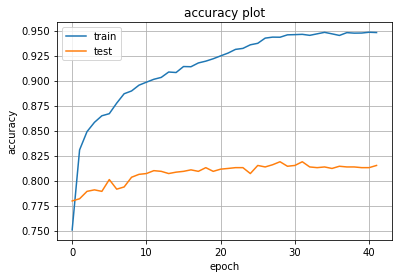

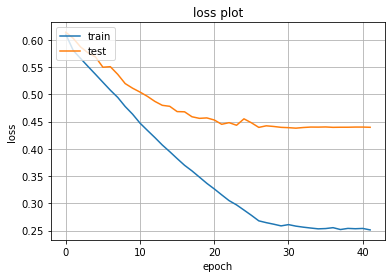

In [5]:
model_VGG19_FINAL02 = load_model('modelos/Modelo_VGG19_FINAL02.hdf5')

df_VGG19 = pd.read_csv('logs/trainingVGG19_FINAL02.csv')

graph_line(df_VGG19['AUC'],df_VGG19['val_AUC'],'AUC','AUC plot')
graph_line(df_VGG19['accuracy'],df_VGG19['val_accuracy'],'accuracy','accuracy plot')
graph_line(df_VGG19['loss'],df_VGG19['val_loss'],'loss','loss plot')

<h3>Conclusão III</h3>

<p>
Ao iniciar os trabalhos, nos deparamos com uma base de dados com mais de 100 mil imagens. E nos apressamos em criar modelos e por o conhecimento em prática.

Com o passar do projeto, percebemos que observar o dataset e dar atenção ao que tinhamos e quais técnicas deveríamos aplicar era mais importante.

Ao adicionar o segundo dataset, ganhamos novas imagens com novos formatos, o que nos permitiu generalizar mais o estudo para atender melhor o mundo real.

O problema em si, tende a ser um pouco mais complexo do que esperado. Pois as imagens em si, tinham uma classificação de 90% de acerto. O segundo dataset apresentava ainda variações de rotação e posição. A ausência de um especialista agregada a uma possível imprecisão das classificações das imagens utilizadas nos datasets, tais quais um indivíduo não treinado não conseguiria identificar, acresceram ao problema uma dificuldade maior.

Os modelos tenderam a ter Overfit no treino, porém ainda assim atingiram bons resultados em teste.

Para futuros estudos, é recomendado utilizar uma estrutura de K-FOLD para que o Overfitting diminua e melhorar as ideias de data augmentation, para tentar focar mais nas 'texturas' e menos nas formas em si, como concluímos que os modelos estavam tentando.

Acreditamos que possa servir como guia para os próximos interessados e no futuro construir uma solução definitiva ao problema. 
</p>

<h3>Repositório do projeto</h3>

https://github.com/DeversonBasilio/TCC_IA_2019_1

https://github.com/luizfernando10/TCC_IA_2019_1

https://drive.google.com/drive/folders/1MaHG3G3drenmpQG76BdImb36m2BuqzuJ (URL Projeto Completo)

<h3>Referências</h3>

<ul>
    <li><a href="https://www.sanarmed.com/resumos-pneumonia-ligas">[001]: Resumos: Pneumonia | Ligas </a></li>
    <li><a href="https://www.scielo.br/pdf/reben/v64n2/a21v64n2.pdf">[002]:Importância da anamnese e do e Importância da anamnese e do exame físico para o cuidado do enfermeiro</a></li>
    <li><a href="https://w2.fop.unicamp.br/ddo/patologia/downloads/db301_un1_ExameClinico.pdf">[003]: EXAME CLÍNICO</a></li>
    <li><a href="http://www.oncoguia.org.br/conteudo/o-que-sao-exames-de-imagem/6790/842/">[004] O que são exames de imagem </li>
    <li>
        <a href="https://github.com/jkjung-avt/keras-cats-dogs-tutorial/blob/master/train_cropped.py">[005] keras-cats-dogs-tutorial</a>
    </li>
    <li>
        <a href="https://keras.io/api/applications/">[006] Keras Applications</a>
    </li>
    <li>
        <a href="https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint">[007] tf.keras.callbacks.ModelCheckpoint</a>
    </li>
    <li>
        <a href="https://medium.com/@italojs/saving-your-weights-for-each-epoch-keras-callbacks-b494d9648202">[008] Saving your weights for each epoch — Keras callbacks</a>
    </li>
    <li>
        <a href="https://gombru.github.io/2018/05/23/cross_entropy_loss/">[009] Understanding Categorical Cross-Entropy Loss, Binary Cross-Entropy Loss, Softmax Loss, Logistic Loss...</a>
    </li>
     <li>
        <a href="https://keras.io/api/metrics/classification_metrics/#recall-class">[010] Classification metrics based on True/False positives & negatives</a>
    </li>
     <li>
        <a href="https://www.researchgate.net/post/Which_Image_resolution_should_I_use_for_training_for_deep_neural_network">[011] Which Image resolution should I use for training for deep neural network</a>
    </li>
</ul>